# Import Modules

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import Data

In [3]:
hdb = pd.read_csv('./data_hdb/hdb.csv')

In [4]:
hdb['date'] = pd.to_datetime(hdb['date'], format = '%Y-%m-%d')

In [6]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 826581 non-null  datetime64[ns]
 1   year                 826581 non-null  int64         
 2   month                826581 non-null  int64         
 3   town                 826581 non-null  object        
 4   flat_type            826581 non-null  object        
 5   block                826581 non-null  object        
 6   street_name          826581 non-null  object        
 7   storey_range         826581 non-null  object        
 8   floor_area_sqm       826581 non-null  float64       
 9   flat_model           826581 non-null  object        
 10  lease_commence_date  826581 non-null  int64         
 11  resale_price         826581 non-null  float64       
 12  remaining_lease      826581 non-null  int64         
dtypes: datetime64[

In [125]:
test = hdb[(hdb.town == "JURONG WEST") & 
           ((hdb.flat_type == "3 ROOM")|(hdb.flat_type == "4 ROOM")|(hdb.flat_type == "5 ROOM"))]

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
553,2015-01-01,2015,1,JURONG WEST,3 ROOM,186,BOON LAY AVE,10 TO 12,59.0,Improved,1975,248000.0,59
554,2015-01-01,2015,1,JURONG WEST,3 ROOM,185,BOON LAY AVE,13 TO 15,59.0,Improved,1975,255000.0,59
555,2015-01-01,2015,1,JURONG WEST,3 ROOM,210,BOON LAY PL,01 TO 03,65.0,Improved,1977,255000.0,61
556,2015-01-01,2015,1,JURONG WEST,3 ROOM,186,BOON LAY AVE,04 TO 06,59.0,Improved,1975,258000.0,59
557,2015-01-01,2015,1,JURONG WEST,3 ROOM,495,JURONG WEST ST 41,01 TO 03,64.0,Simplified,1986,260000.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
825953,2014-12-01,2014,12,JURONG WEST,5 ROOM,179,YUNG SHENG RD,07 TO 09,116.0,Improved,2001,468500.0,86
825954,2014-12-01,2014,12,JURONG WEST,5 ROOM,179,YUNG SHENG RD,10 TO 12,116.0,Improved,2001,440000.0,86
825955,2014-12-01,2014,12,JURONG WEST,5 ROOM,184,YUNG SHENG RD,01 TO 03,116.0,Improved,2001,400000.0,86
825956,2014-12-01,2014,12,JURONG WEST,5 ROOM,181,YUNG SHENG RD,01 TO 03,116.0,Improved,2001,400000.0,86


In [8]:
house = hdb.groupby(["town", "block", "flat_type", "street_name", "floor_area_sqm", "lease_commence_date"]).size().reset_index(name='counts').sort_values("counts", ascending = False)

In [9]:
house = house.reset_index(drop = True)

In [10]:
house

,town,block,flat_type,street_name,floor_area_sqm,lease_commence_date,counts
0,JURONG WEST,211,3 ROOM,BOON LAY PL,65.0,1976,667
1,JURONG WEST,186,3 ROOM,BOON LAY AVE,59.0,1975,618
2,JURONG WEST,185,3 ROOM,BOON LAY AVE,59.0,1975,615
3,JURONG WEST,208,3 ROOM,BOON LAY PL,65.0,1976,613
4,JURONG WEST,210,3 ROOM,BOON LAY PL,65.0,1977,612
...,...,...,...,...,...,...,...
36376,JURONG WEST,327,4 ROOM,TAH CHING RD,107.0,1997,1
36377,JURONG WEST,326,5 ROOM,TAH CHING RD,119.0,1997,1
36378,JURONG WEST,321,5 ROOM,TAH CHING RD,119.0,1997,1
36379,JURONG WEST,272A,5 ROOM,JURONG WEST ST 24,115.0,2003,1


# Functions

In [11]:
def get_unit(unit):
    return  hdb[(hdb.town == unit.town) 
        & (hdb.block == unit.block) 
        & (hdb.flat_type == unit.flat_type) 
        & (hdb.street_name == unit.street_name) 
        & (hdb.floor_area_sqm == unit.floor_area_sqm)
        & (hdb.lease_commence_date == unit.lease_commence_date)]

In [12]:
def plot_unit_prices(num, house):
    for i in range(num):
        unit = house.iloc[i]
        a = get_unit(unit)
        a = a.loc[:,["date", "resale_price"]]
        a[f"{unit.flat_type} {unit.town}_{unit.block} ({unit.floor_area_sqm})"] = a["resale_price"]
        a.drop("resale_price", axis=1, inplace=True)
        a = a.reset_index(drop = True)
        if i == 0:
            master = a
        else:
            master = pd.concat([master, a], ignore_index=True)
    f = plt.figure(figsize=(16, 8))
    for i in range(len(master.columns)-1):
        ax = sb.lineplot(x = 'date', y = master.iloc[:, i+1], data = master)

#     ax.set_ylim(0,1000000)
    ax.set_xlim(pd.to_datetime("1990-01-01", format = '%Y-%m-%d'),pd.to_datetime("2020-01-01", format = '%Y-%m-%d'))
    ax.set(ylabel="resale_price")
    return master

In [13]:
def plot_median_unit_prices(num, house):
    for i in range(num):
        unit = house.iloc[i]
        a = get_unit(unit)
        a = a.loc[:,["date", "resale_price"]]
        if i == 0:
            master = a
        else:
            master = pd.concat([master, a], ignore_index=True)
    master = master.groupby("date").median().reset_index()
    f = plt.figure(figsize=(16, 8))
    sb.lineplot(x = 'date', y = "resale_price", data = master)
    return master

# Flat Type Breakdown

In [28]:
flat_type_breakdown = hdb.groupby("flat_type").size().reset_index(name = "counts").sort_values("counts", ascending = False)

In [29]:
flat_type_breakdown

,flat_type,counts
3,4 ROOM,309314
2,3 ROOM,272580
4,5 ROOM,170408
5,EXECUTIVE,62641
1,2 ROOM,9863
0,1 ROOM,1273
6,MULTI GENERATION,279
7,MULTI-GENERATION,223


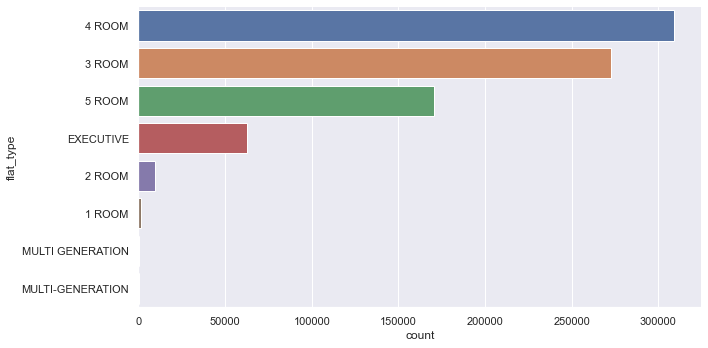

In [68]:
sb.catplot(y = "flat_type", data = hdb, order = hdb['flat_type'].value_counts().index, kind = "count", height=5, aspect=5)

# 3 ROOM Resale Price vs Time

In [70]:
rm3_house = house[(house.flat_type == "3 ROOM")]

<AxesSubplot:ylabel='Count'>

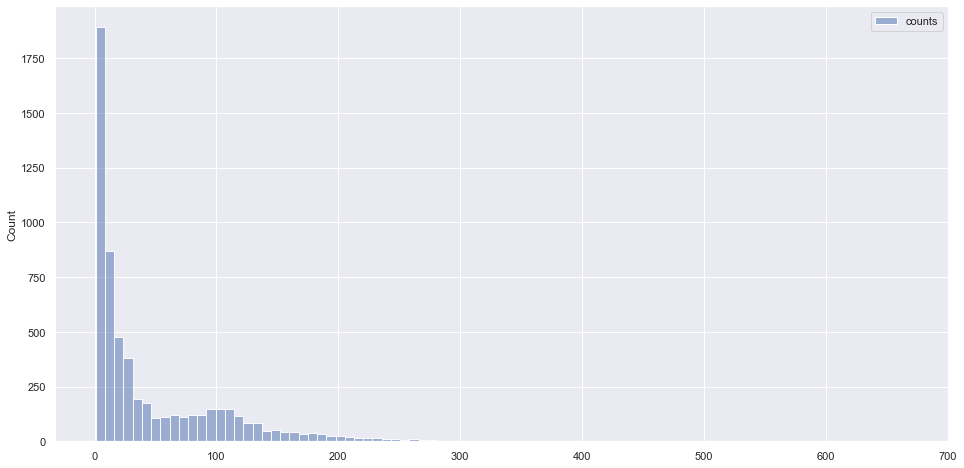

In [71]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = rm3_house.loc[:,["counts"]])

In [78]:
rm3_house

,town,block,flat_type,street_name,floor_area_sqm,lease_commence_date,counts
0,JURONG WEST,211,3 ROOM,BOON LAY PL,65.0,1976,667
1,JURONG WEST,186,3 ROOM,BOON LAY AVE,59.0,1975,618
2,JURONG WEST,185,3 ROOM,BOON LAY AVE,59.0,1975,615
3,JURONG WEST,208,3 ROOM,BOON LAY PL,65.0,1976,613
4,JURONG WEST,210,3 ROOM,BOON LAY PL,65.0,1977,612
...,...,...,...,...,...,...,...
36342,JURONG WEST,172,3 ROOM,BOON LAY DR,64.0,1974,1
36343,JURONG WEST,171,3 ROOM,BOON LAY DR,64.0,1974,1
36344,JURONG WEST,170,3 ROOM,BOON LAY DR,64.0,1974,1
36369,JURONG WEST,339C,3 ROOM,KANG CHING RD,70.0,2012,1


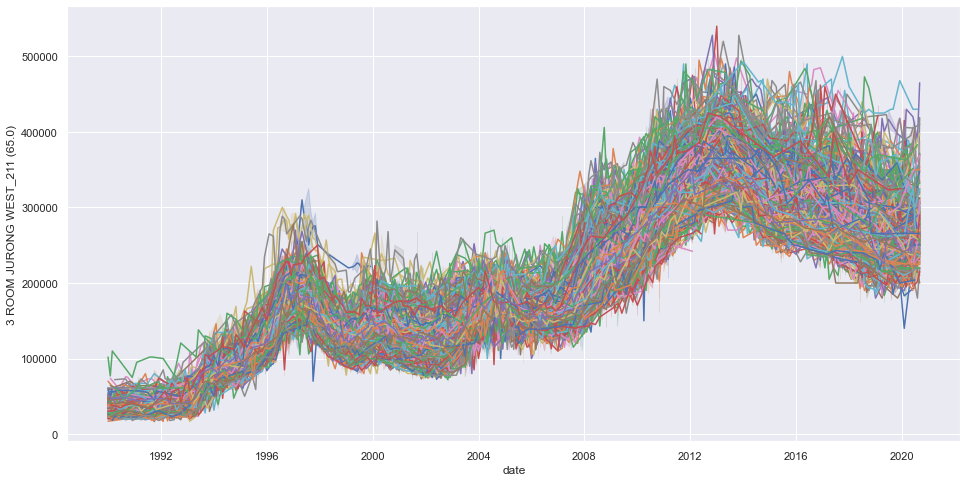

In [79]:
rm3 = plot_unit_prices(500, rm3_house)

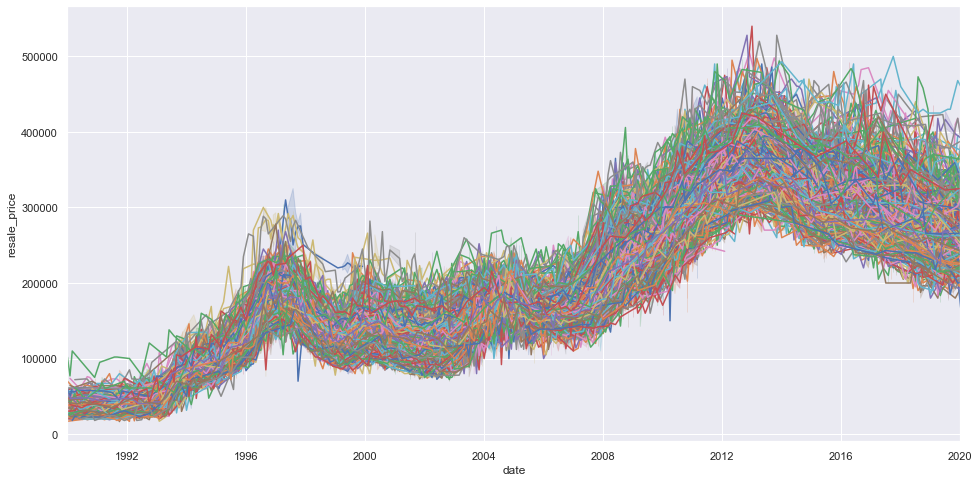

In [87]:
rm3 = plot_unit_prices(500, rm3_house)

# 4 ROOM Resale Price vs Time

In [27]:
rm4_house = house[(house.flat_type == "4 ROOM") & (house.counts > 80)]

<AxesSubplot:ylabel='Count'>

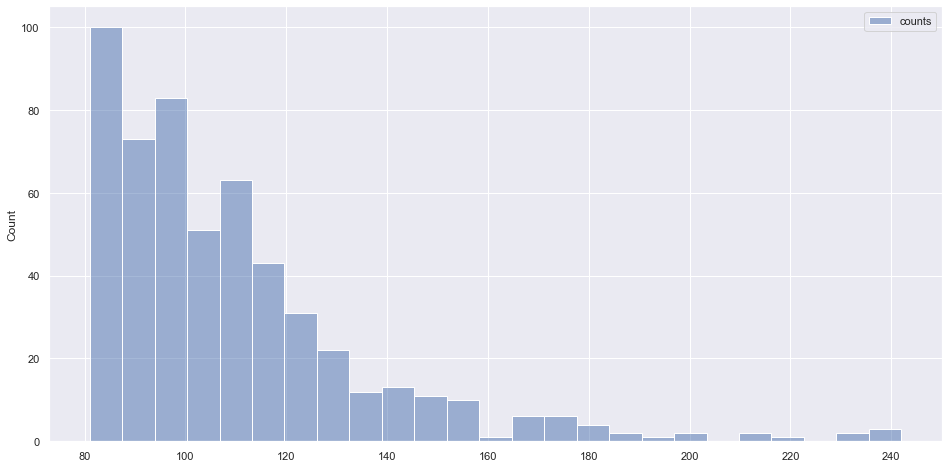

In [28]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = rm4_house.loc[:,["counts"]])

In [29]:
rm4_house

,town,block,flat_type,street_name,floor_area_sqm,lease_commence_date,counts
64,BEDOK,34,4 ROOM,BEDOK STH AVE 2,90.0,1977,242
70,JURONG WEST,217,4 ROOM,BOON LAY AVE,87.0,1975,238
74,QUEENSTOWN,168A,4 ROOM,QUEENSWAY,84.0,1974,237
78,TOA PAYOH,222,4 ROOM,LOR 8 TOA PAYOH,82.0,1976,235
81,CLEMENTI,716,4 ROOM,CLEMENTI WEST ST 2,91.0,1981,235
...,...,...,...,...,...,...,...
2176,SERANGOON,328,4 ROOM,SERANGOON AVE 3,84.0,1986,81
2177,YISHUN,805,4 ROOM,YISHUN RING RD,84.0,1987,81
2180,ANG MO KIO,544,4 ROOM,ANG MO KIO AVE 10,92.0,1981,81
2182,YISHUN,257,4 ROOM,YISHUN RING RD,84.0,1986,81


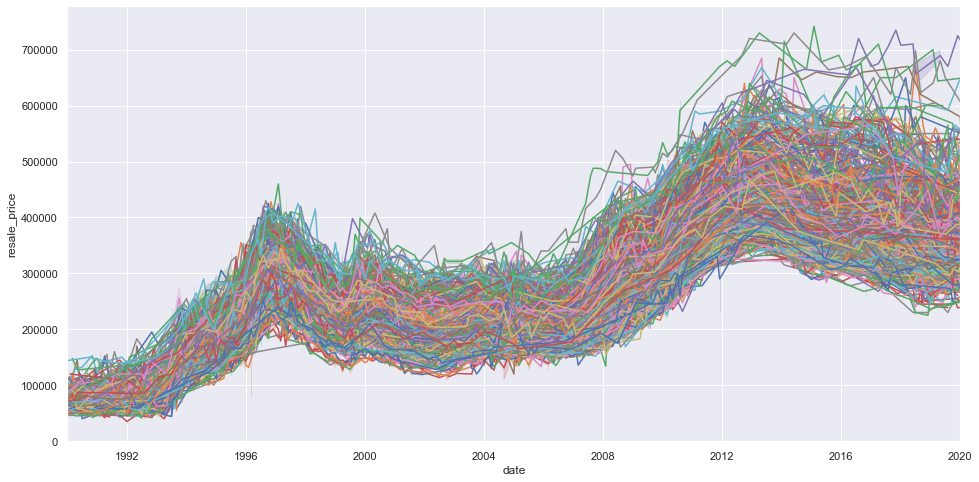

In [30]:
rm4 = plot_unit_prices(500, rm4_house)

In [31]:
rm4

,date,4 ROOM BEDOK_34 (90.0),4 ROOM JURONG WEST_217 (87.0),4 ROOM QUEENSTOWN_168A (84.0),4 ROOM TOA PAYOH_222 (82.0),4 ROOM CLEMENTI_716 (91.0),4 ROOM BEDOK_36 (84.0),4 ROOM BEDOK_51 (84.0),4 ROOM BEDOK_718 (104.0),4 ROOM BEDOK_35 (90.0),...,4 ROOM YISHUN_174 (84.0),4 ROOM TAMPINES_856 (84.0),4 ROOM CLEMENTI_324 (91.0),4 ROOM GEYLANG_320 (84.0),4 ROOM SERANGOON_332 (84.0),4 ROOM BUKIT BATOK_363 (94.0),4 ROOM PASIR RIS_633 (104.0),4 ROOM WOODLANDS_786D (100.0),4 ROOM CHOA CHU KANG_285 (104.0),4 ROOM BUKIT MERAH_113 (103.0)
0,2015-01-01,405000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-05-01,410000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-06-01,417000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,410000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-03-01,406000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,2011-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510000.0
55846,2011-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545000.0
55847,2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560000.0
55848,2013-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586800.0


# 5 ROOM Resale Price vs Time

In [43]:
rm5_house = house[(house.flat_type == "5 ROOM") & (house.counts > 55)]

<AxesSubplot:ylabel='Count'>

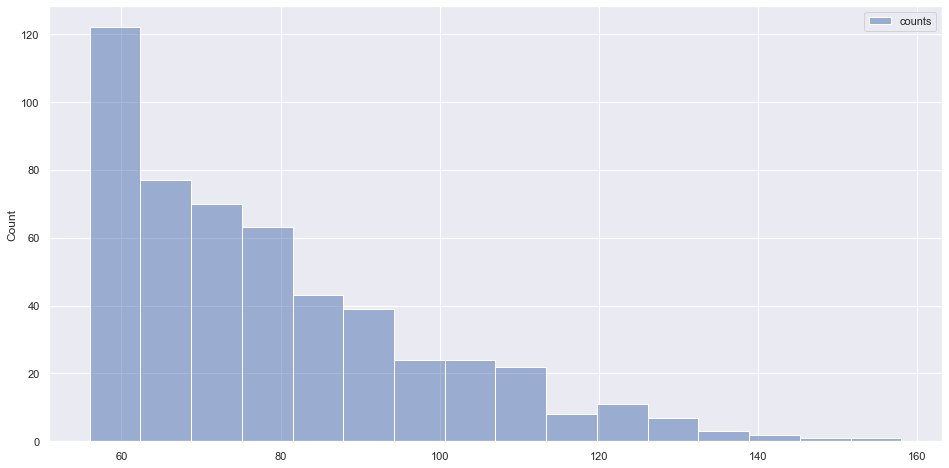

In [44]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data = rm5_house.loc[:,["counts"]])

In [45]:
rm5_house.shape

(517, 7)

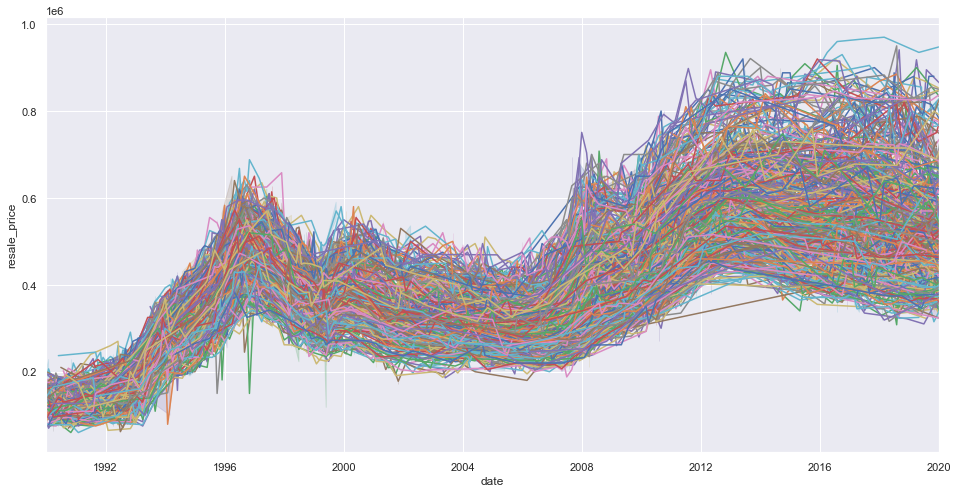

In [46]:
rm5 = plot_unit_prices(500, rm5_house)

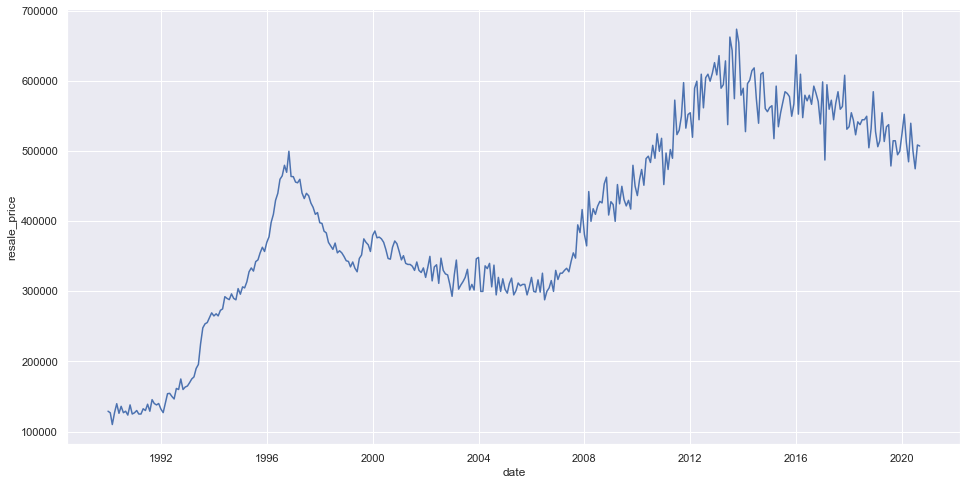

In [628]:
rm5_median = plot_median_unit_prices(190, rm5_house)

In [629]:
rm5_median

,date,resale_price
0,1990-01-01,129000.0
1,1990-02-01,126750.0
2,1990-03-01,110000.0
3,1990-04-01,127000.0
4,1990-05-01,139750.0
...,...,...
364,2020-05-01,540000.0
365,2020-06-01,500000.0
366,2020-07-01,475000.0
367,2020-08-01,509000.0


# 3-5 Room Median

In [47]:
hdb

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01-01,2015,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01-01,2015,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01-01,2015,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2014-12-01,2014,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,73
826577,2014-12-01,2014,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,73
826578,2014-12-01,2014,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,77
826579,2014-12-01,2014,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,70


In [69]:
hdb_35 = hdb[(hdb.flat_type == "3 ROOM") | (hdb.flat_type == "4 ROOM") | (hdb.flat_type == "5 ROOM")]

In [89]:
hdb_35

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01-01,2015,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01-01,2015,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01-01,2015,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826572,2014-12-01,2014,12,YISHUN,5 ROOM,612,YISHUN ST 61,04 TO 06,121.0,Improved,1987,445000.0,72
826573,2014-12-01,2014,12,YISHUN,5 ROOM,713,YISHUN ST 71,01 TO 03,122.0,Improved,1987,415000.0,72
826574,2014-12-01,2014,12,YISHUN,5 ROOM,757,YISHUN ST 72,01 TO 03,122.0,Improved,1986,485000.0,71
826575,2014-12-01,2014,12,YISHUN,5 ROOM,819,YISHUN ST 81,01 TO 03,127.0,Improved,1987,500000.0,72


In [72]:
a = hdb_35[hdb_35.flat_type == "3 ROOM"].groupby(["date"]).median().reset_index()

In [73]:
a["resale_price"]

0       42000.0
1       45000.0
2       43000.0
3       44000.0
4       43000.0
         ...   
364    282000.0
365    285000.0
366    285000.0
367    293000.0
368    295044.0
Name: resale_price, Length: 369, dtype: float64

In [90]:
hdb_median_35 = None
for i in range(3, 5+1):
    a = hdb_35[hdb_35.flat_type == f"{i} ROOM"].groupby(["date"]).median().reset_index()
    if hdb_median_35 is None:
        hdb_median_35 = pd.DataFrame({"date": a["date"], f"{i} ROOM": a["resale_price"]})
        print(hdb_median_35.head(5))
    else:
        b = pd.DataFrame({"date": a["date"], f"{i} ROOM": a["resale_price"]})
        hdb_median_35 = pd.concat([hdb_median_35, b], ignore_index=True)
    

        date   3 ROOM
0 1990-01-01  42000.0
1 1990-02-01  45000.0
2 1990-03-01  43000.0
3 1990-04-01  44000.0
4 1990-05-01  43000.0


In [91]:
hdb_median_35

,date,3 ROOM,4 ROOM,5 ROOM
0,1990-01-01,42000.0,NaN,NaN
1,1990-02-01,45000.0,NaN,NaN
2,1990-03-01,43000.0,NaN,NaN
3,1990-04-01,44000.0,NaN,NaN
4,1990-05-01,43000.0,NaN,NaN
...,...,...,...,...
1102,2020-05-01,NaN,NaN,505000.0
1103,2020-06-01,NaN,NaN,488000.0
1104,2020-07-01,NaN,NaN,508000.0
1105,2020-08-01,NaN,NaN,490000.0


[Text(0, 0.5, 'resale_price')]

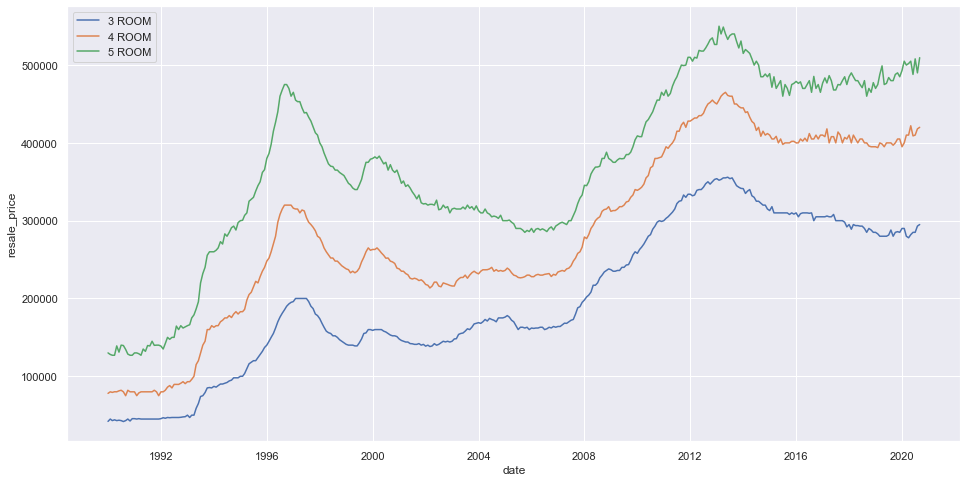

In [109]:
f = plt.figure(figsize=(16, 8))
ax = sb.lineplot(x = 'date', y = "3 ROOM", data = hdb_median_35, label="3 ROOM")
ax = sb.lineplot(x = 'date', y = "4 ROOM", data = hdb_median_35, label="4 ROOM")
ax = sb.lineplot(x = 'date', y = "5 ROOM", data = hdb_median_35, label="5 ROOM")
ax.set(ylabel="resale_price")

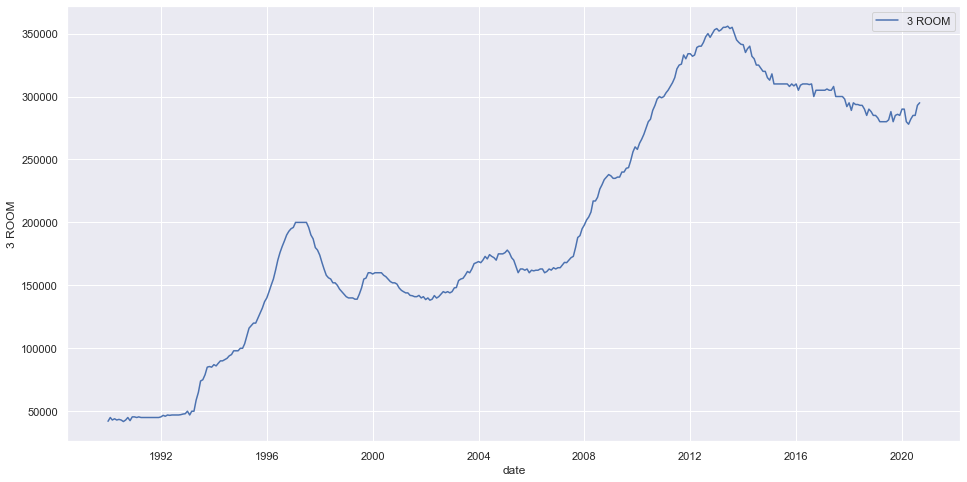

In [110]:
f = plt.figure(figsize=(16, 8))
ax = sb.lineplot(x = 'date', y = "3 ROOM", data = hdb_median_35, label="3 ROOM")

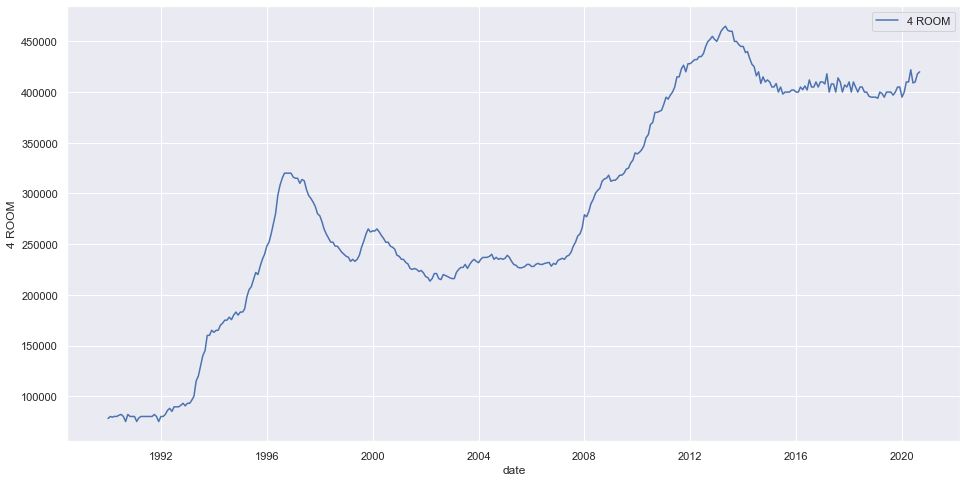

In [111]:
f = plt.figure(figsize=(16, 8))
ax = sb.lineplot(x = 'date', y = "4 ROOM", data = hdb_median_35, label="4 ROOM")

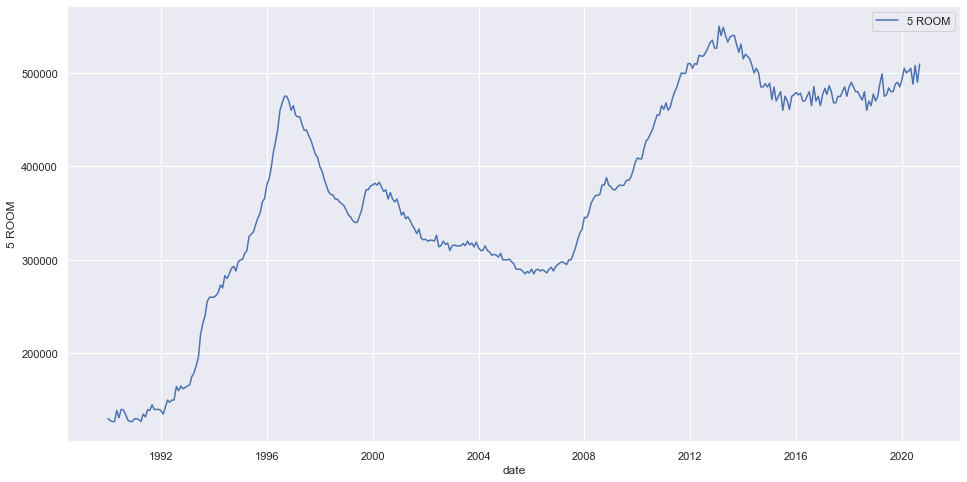

In [112]:
f = plt.figure(figsize=(16, 8))
ax = sb.lineplot(x = 'date', y = "5 ROOM", data = hdb_median_35, label="5 ROOM")

[Text(0, 0.5, 'resale_price')]

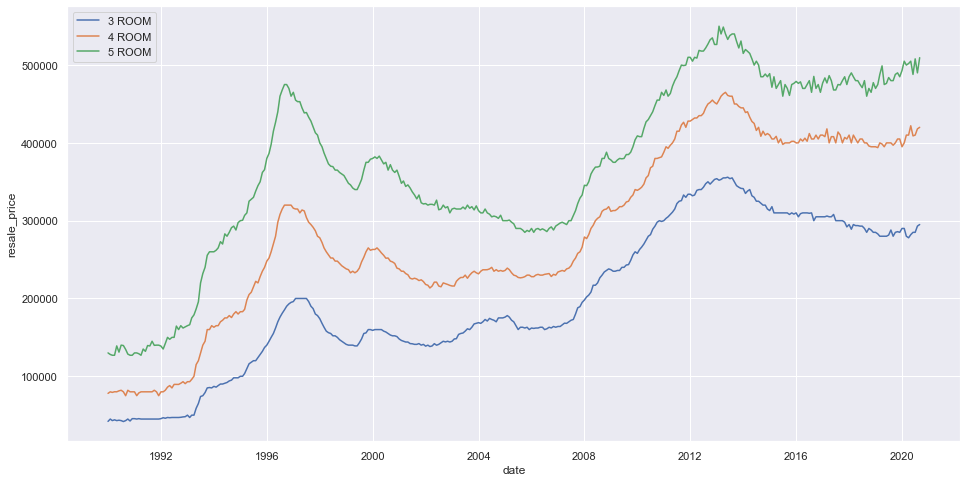

In [114]:
f = plt.figure(figsize=(16, 8))
for i in range(3, 5+1):
    a = hdb[hdb.flat_type == f"{i} ROOM"].groupby("date").median().reset_index()
    ax = sb.lineplot(x = 'date', y = "resale_price", data = a, label=f"{i} ROOM")
ax.set(ylabel="resale_price")

# Geylang Blk 60 Median

<AxesSubplot:xlabel='date', ylabel='resale_price'>

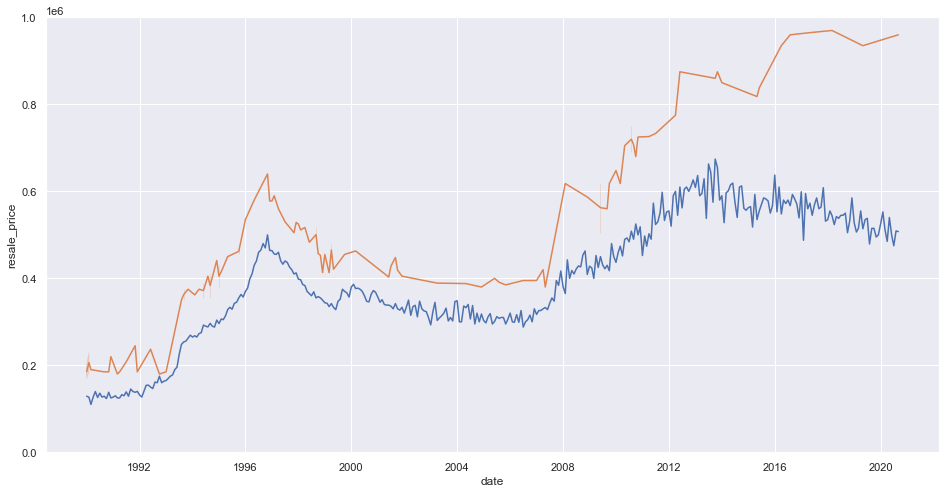

In [658]:
f = plt.figure(figsize=(16, 8))
sb.lineplot(x = 'date', y = "resale_price", data = rm5_geylang_median).set_ylim(0, 1000000)
sb.lineplot(x = 'date', y = "geylang", data = rm5_geylang_median)

In [659]:
test = rm5_house[(rm5_house.town == "GEYLANG") & (rm5_house.block == "60")]

In [635]:
test

,town,block,flat_type,street_name,floor_area_sqm,lease_commence_date,counts
12061,GEYLANG,60,5 ROOM,DAKOTA CRES,140.0,1983,108


In [612]:
rm5_median = rm5.groupby("date").median().reset_index()

In [640]:
rm5["5 ROOM GEYLANG_60 (140.0)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
18961   NaN
18962   NaN
18963   NaN
18964   NaN
18965   NaN
Name: 5 ROOM GEYLANG_60 (140.0), Length: 18966, dtype: float64

In [646]:
rm5_geylang = pd.DataFrame({"date": rm5["date"], "geylang": rm5["5 ROOM GEYLANG_60 (140.0)"]})

In [647]:
rm5_geylang_median = pd.concat([rm5_median, rm5_geylang], ignore_index=True)

In [648]:
rm5_geylang_median

,date,resale_price,geylang
0,1990-01-01,129000.0,NaN
1,1990-02-01,126750.0,NaN
2,1990-03-01,110000.0,NaN
3,1990-04-01,127000.0,NaN
4,1990-05-01,139750.0,NaN
...,...,...,...
19330,2011-11-01,NaN,NaN
19331,2012-02-01,NaN,NaN
19332,2012-03-01,NaN,NaN
19333,2013-04-01,NaN,NaN


In [46]:
blk60 = hdb[(hdb.town == "GEYLANG")&(hdb.flat_type == "5 ROOM")&(hdb.block == "60")&(hdb.floor_area_sqm == 140.0)].groupby("date").median().reset_index()

In [47]:
blk60

,date,year,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,1990.0,1.0,140.0,1983.0,185500.0,92.0
1,1990-02-01,1990.0,2.0,140.0,1983.0,206500.0,92.0
2,1990-03-01,1990.0,3.0,140.0,1983.0,190000.0,92.0
3,1990-09-01,1990.0,9.0,140.0,1983.0,185000.0,92.0
4,1990-11-01,1990.0,11.0,140.0,1983.0,185000.0,92.0
...,...,...,...,...,...,...,...
89,2016-08-01,2016.0,8.0,140.0,1983.0,960000.0,66.0
90,2017-05-01,2017.0,5.0,140.0,1983.0,965000.0,65.0
91,2018-03-01,2018.0,3.0,140.0,1983.0,970000.0,64.0
92,2019-05-01,2019.0,5.0,140.0,1983.0,935000.0,63.0


In [53]:
rm5_geylang_median = hdb[(hdb.town == "GEYLANG")&(hdb.flat_type == "5 ROOM")].groupby("date").median().reset_index()

In [54]:
rm5_geylang_median

,date,year,month,floor_area_sqm,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,1990.0,1.0,139.0,1983.0,170000.0,92.0
1,1990-02-01,1990.0,2.0,133.0,1982.5,177000.0,91.5
2,1990-03-01,1990.0,3.0,137.0,1983.0,132000.0,92.0
3,1990-04-01,1990.0,4.0,120.0,1977.0,128000.0,86.0
4,1990-05-01,1990.0,5.0,127.5,1980.5,175000.0,89.5
...,...,...,...,...,...,...,...
361,2020-05-01,2020.0,5.0,126.0,1997.0,615000.0,76.0
362,2020-06-01,2020.0,6.0,119.0,1997.5,717500.0,76.5
363,2020-07-01,2020.0,7.0,120.0,1997.0,700000.0,76.0
364,2020-08-01,2020.0,8.0,122.0,1983.0,510000.0,62.0


In [50]:
rm5_median = hdb[hdb.flat_type == "5 ROOM"].groupby("date").median().reset_index()

In [109]:
f = plt.figure(figsize=(16, 8))
for i in range(3, 5+1):
    a = hdb[hdb.flat_type == f"{i} ROOM"].groupby(["date"]).median().reset_index()
    ax = sb.lineplot(x = 'date', y = "resale_price", data = a, label=f"{i} ROOM")
ax.set(ylabel="resale_price")

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01-01,2015,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01-01,2015,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01-01,2015,1,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01-01,2015,1,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01-01,2015,1,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2014-12-01,2014,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,73
826577,2014-12-01,2014,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,73
826578,2014-12-01,2014,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,77
826579,2014-12-01,2014,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,70


<AxesSubplot:xlabel='date', ylabel='resale_price'>

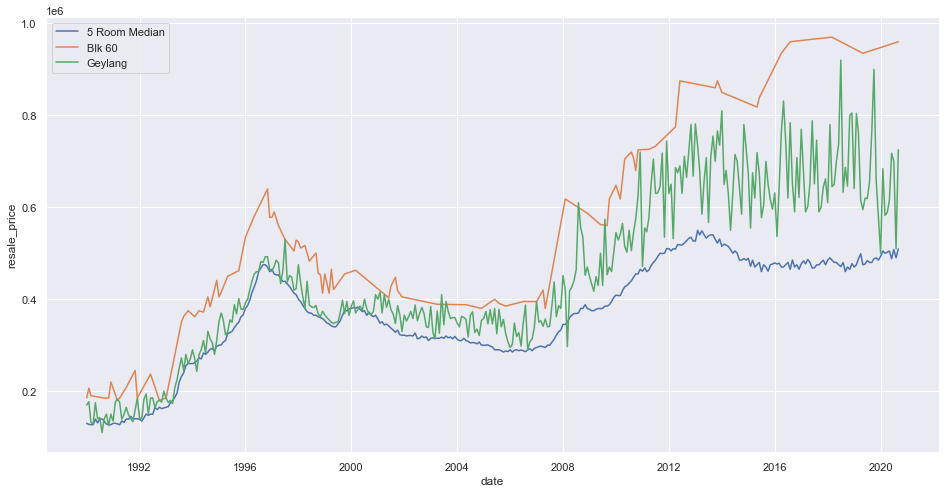

In [119]:
rm5_median = hdb[hdb.flat_type == "5 ROOM"].groupby("date").median().reset_index()
rm5_geylang_median = hdb[(hdb.town == "GEYLANG")&(hdb.flat_type == "5 ROOM")].groupby("date").median().reset_index()
blk60 = hdb[(hdb.town == "GEYLANG")&(hdb.flat_type == "5 ROOM")&(hdb.block == "60")&(hdb.floor_area_sqm == 140.0)].groupby("date").median().reset_index()

f = plt.figure(figsize=(16, 8))
sb.lineplot(x = 'date', y = "resale_price", data = rm5_median, label="5 Room Median")
sb.lineplot(x = 'date', y = "resale_price", data = blk60, label="Blk 60")
sb.lineplot(x = 'date', y = "resale_price", data = rm5_geylang_median, label="Geylang")

<AxesSubplot:xlabel='date', ylabel='resale_price'>

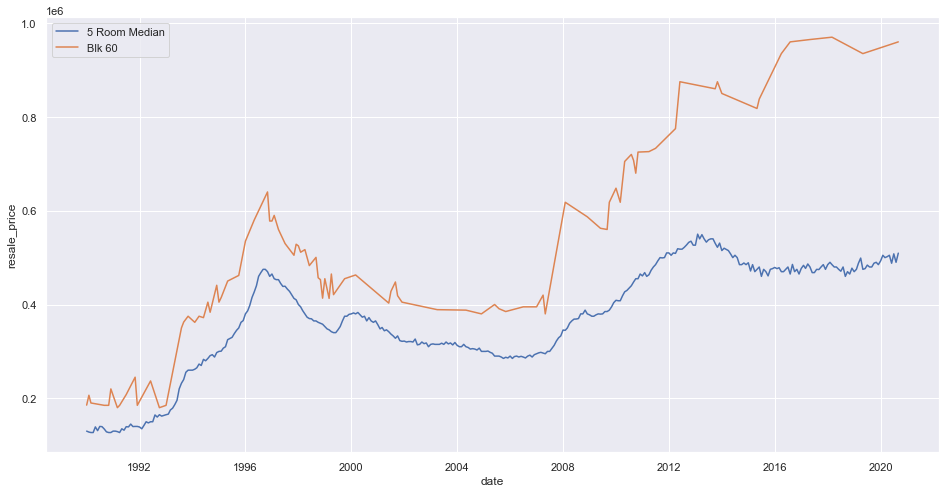

In [120]:
rm5_median = hdb[hdb.flat_type == "5 ROOM"].groupby("date").median().reset_index()
rm5_geylang_median = hdb[(hdb.town == "GEYLANG")&(hdb.flat_type == "5 ROOM")].groupby("date").median().reset_index()
blk60 = hdb[(hdb.town == "GEYLANG")&(hdb.flat_type == "5 ROOM")&(hdb.block == "60")&(hdb.floor_area_sqm == 140.0)].groupby("date").median().reset_index()

f = plt.figure(figsize=(16, 8))
sb.lineplot(x = 'date', y = "resale_price", data = rm5_median, label="5 Room Median")
sb.lineplot(x = 'date', y = "resale_price", data = blk60, label="Blk 60")
# sb.lineplot(x = 'date', y = "resale_price", data = rm5_geylang_median, label="Geylang")

# 3 Room Town BreakDown

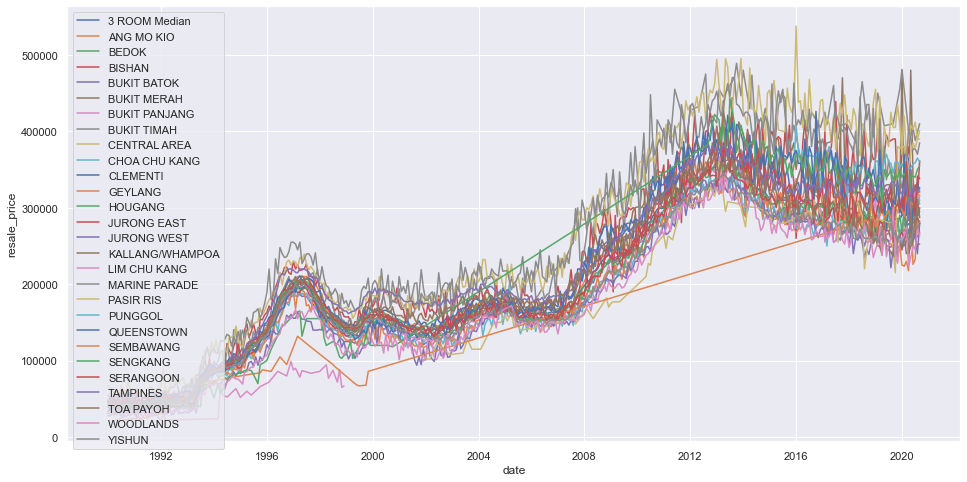

In [108]:
room = "3 ROOM"
f = plt.figure(figsize=(16, 8))
rm5_median = hdb[hdb.flat_type == room].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = rm5_median, label= f"{room} Median")

towns = list(hdb[hdb.flat_type == room].groupby("town").size().reset_index(name = "counts")["town"])
for town in towns:
    a = hdb[(hdb.town == town)&(hdb.flat_type == room)].groupby("date").median().reset_index()
    sb.lineplot(x = 'date', y = "resale_price", data = a, label=town)

# 4 Room Town BreakDown

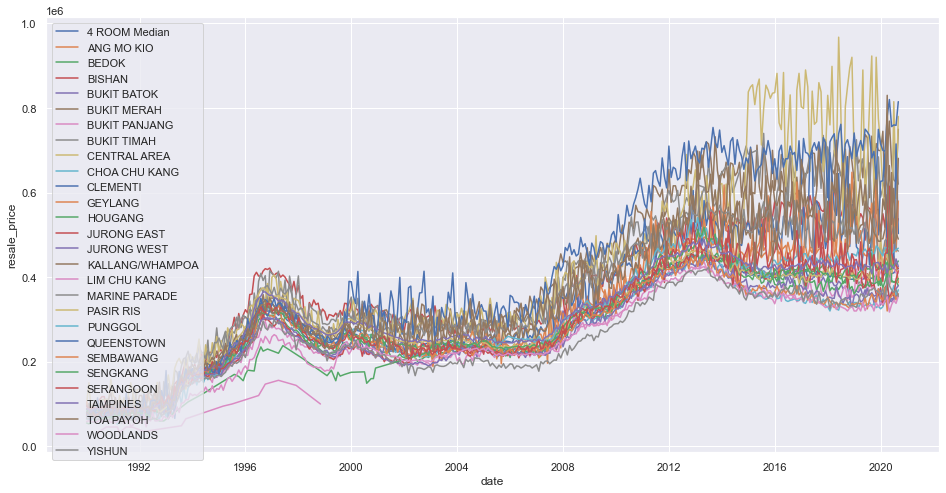

In [107]:
room = "4 ROOM"
f = plt.figure(figsize=(16, 8))
rm5_median = hdb[hdb.flat_type == room].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = rm5_median, label= f"{room} Median")

towns = list(hdb[hdb.flat_type == room].groupby("town").size().reset_index(name = "counts")["town"])
for town in towns:
    a = hdb[(hdb.town == town)&(hdb.flat_type == room)].groupby("date").median().reset_index()
    sb.lineplot(x = 'date', y = "resale_price", data = a, label=town)

# 5 Room Town BreakDown

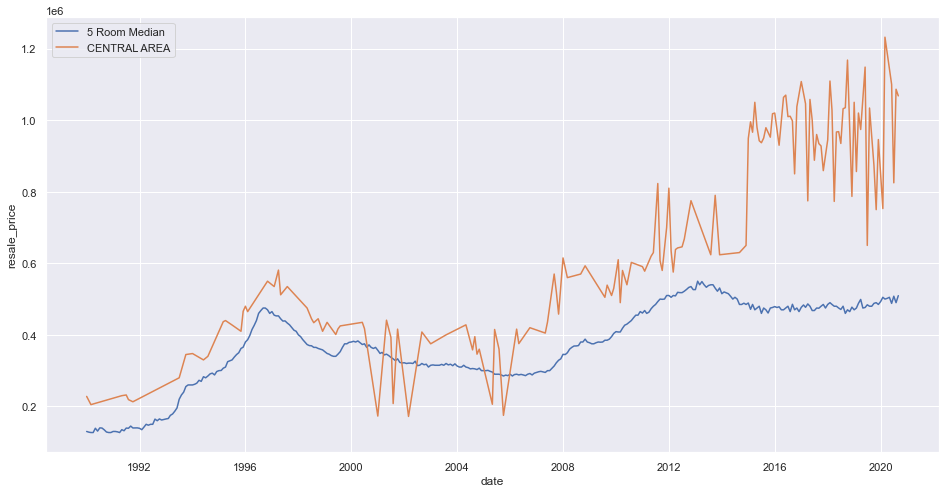

In [69]:
f = plt.figure(figsize=(16, 8))
rm5_median = hdb[hdb.flat_type == "5 ROOM"].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = rm5_median, label="5 Room Median")

towns = list(hdb[hdb.flat_type == "5 ROOM"].groupby("town").size().reset_index(name = "counts")["town"])
for town in towns:
    if town != "CENTRAL AREA":
        continue
    a = hdb[(hdb.town == town)&(hdb.flat_type == "5 ROOM")].groupby("date").median().reset_index()
    sb.lineplot(x = 'date', y = "resale_price", data = a, label=town)

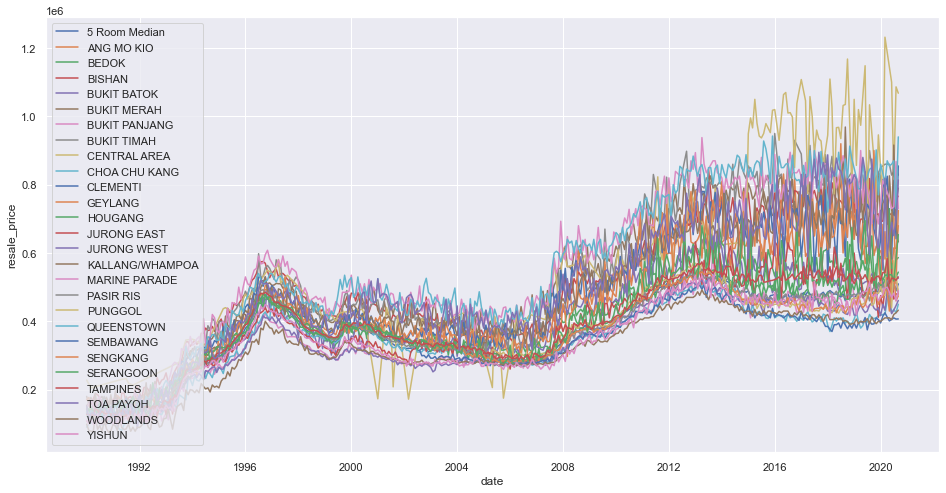

In [72]:
f = plt.figure(figsize=(16, 8))
rm5_median = hdb[hdb.flat_type == "5 ROOM"].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = rm5_median, label="5 Room Median")

towns = list(hdb[hdb.flat_type == "5 ROOM"].groupby("town").size().reset_index(name = "counts")["town"])
for town in towns:
    a = hdb[(hdb.town == town)&(hdb.flat_type == "5 ROOM")].groupby("date").median().reset_index()
    sb.lineplot(x = 'date', y = "resale_price", data = a, label=town)

(0.0, 1000000.0)

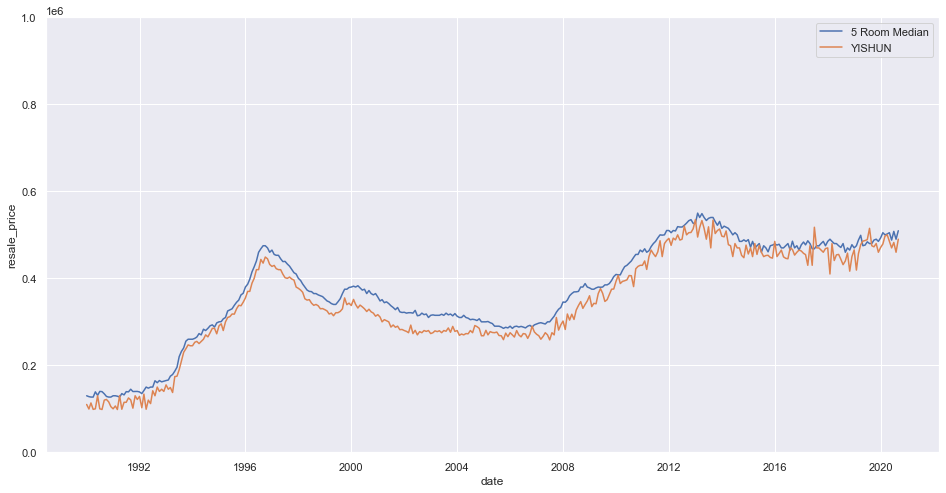

In [106]:
f = plt.figure(figsize=(16, 8))
rm5_median = hdb[hdb.flat_type == "5 ROOM"].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = rm5_median, label="5 Room Median")

towns = list(hdb[hdb.flat_type == "5 ROOM"].groupby("town").size().reset_index(name = "counts")["town"])
town = towns[25]
a = hdb[(hdb.town == town)&(hdb.flat_type == "5 ROOM")].groupby("date").median().reset_index()
sb.lineplot(x = 'date', y = "resale_price", data = a, label=town).set_ylim(0,1000000)